# SURYEAH V M

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from keras import regularizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
train_dir = 'data/train/'
test_dir = 'data/test/'
def count_expression(path, set_):
    dict_ = {}
    for face_expression in os.listdir(path):
        dir_ = path + face_expression
        dict_[face_expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_expression(train_dir, 'train')
test_count = count_expression(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


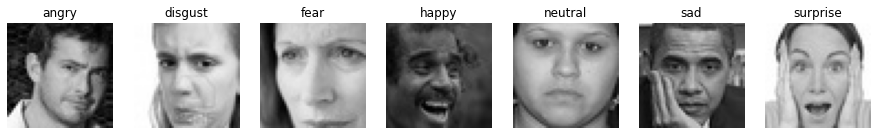

In [3]:
plt.figure(figsize=(20,20))
i = 1
for face_expression in os.listdir(train_dir):
    img = load_img((train_dir + face_expression +'/'+ os.listdir(train_dir + face_expression)[1]))
    plt.subplot(1,9,i)
    plt.imshow(img)
    plt.title(face_expression)
    plt.axis('off')
    i += 1
plt.show()

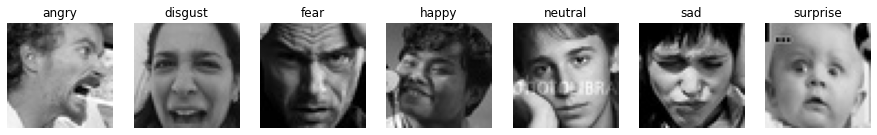

In [4]:
plt.figure(figsize=(20,20))
i = 1
for face_expression in os.listdir(test_dir):
    img = load_img((test_dir + face_expression +'/'+ os.listdir(test_dir + face_expression)[1]))
    plt.subplot(1,9,i)
    plt.imshow(img)
    plt.title(face_expression)
    plt.axis('off')
    i += 1
plt.show()

### Plotting number of images in train set

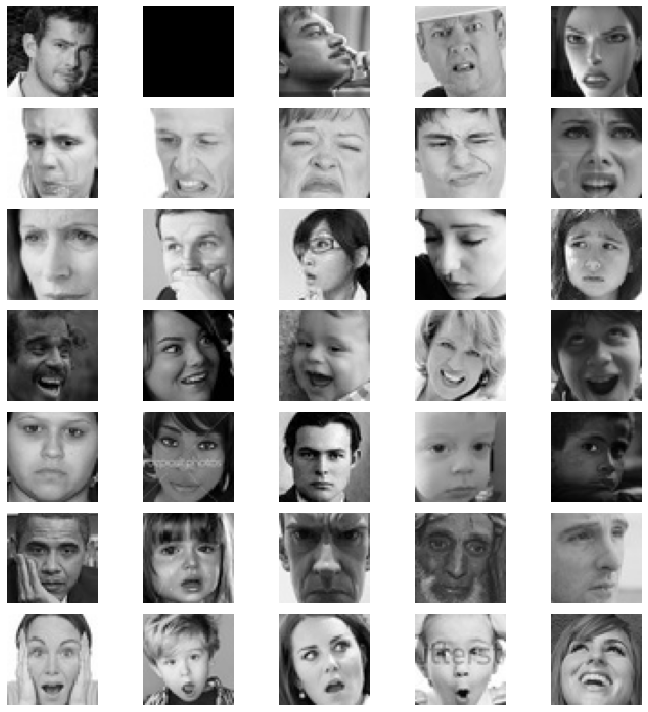

In [7]:
img_size = 50
plt.figure(0, figsize=(10,10))
index = 0
for link in os.listdir("data/train/"):
    for i in range(1,6):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("data/train/" + link + "/" +os.listdir("data/train/" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img)
        plt.axis('off')
plt.tight_layout()

<AxesSubplot:>

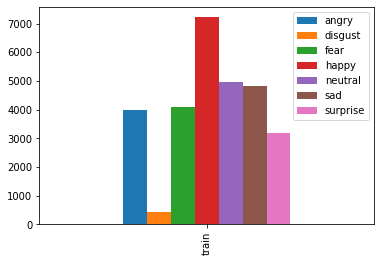

In [8]:
train_count.plot(kind='bar')

### Plotting number of images in test set

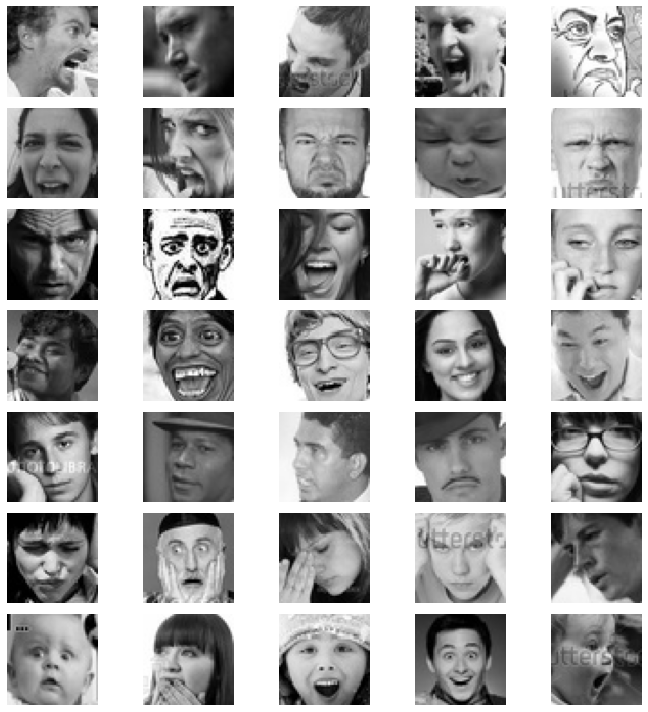

In [10]:
img_size = 50
plt.figure(0, figsize=(10,10))
index = 0
for link in os.listdir("data/test/"):
    for i in range(1,6):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("data/test/" + link + "/" +os.listdir("data/test/" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img)   
        plt.axis('off')
plt.tight_layout()

<AxesSubplot:>

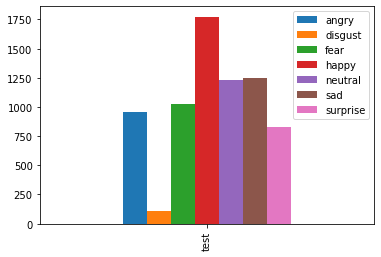

In [11]:
test_count.plot(kind='bar')

### Create train and test sets

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_dir, batch_size=64, target_size=(48,48), shuffle=True, color_mode='grayscale', class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
test_set = test_datagen.flow_from_directory(test_dir, batch_size=64, target_size=(48,48), shuffle=True, color_mode='grayscale', class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

### Initializing and compiling the model

In [40]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [41]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 23, 23, 128)      

In [42]:
history = model.fit(x = training_set, epochs = 1, validation_data = test_set, batch_size=64)

449/449 [==============================] - 172s 381ms/step - loss: 2.2269 - accuracy: 0.2437 - val_loss: 3.1297 - val_accuracy: 0.2679


In [43]:
train_loss, train_acc = model.evaluate(training_set)
test_loss, test_acc = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

113/113 [==============================] - 5s 45ms/step - loss: 3.1297 - accuracy: 0.2679
final train accuracy = 26.37 , validation accuracy = 26.79


### Testing phase
### Detecting face

(48, 48)


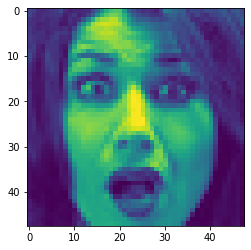

In [44]:
img = image.load_img("data/test/surprise/PrivateTest_11365666.jpg",target_size = (48,48), color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

### Prediction

In [45]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [46]:
img_index = result.index(max(result))
emotion = label_dict[img_index]
emotion

'Surprise'

### Play songs as per the mood

In [48]:
from IPython.display import Audio
print(f'Playing {emotion} song')
Audio(data = f'data/Songs/{emotion}.mp3', autoplay=True)

Playing Surprise song
